<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Deep-Learning/blob/main/Dropout(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Generate Data

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

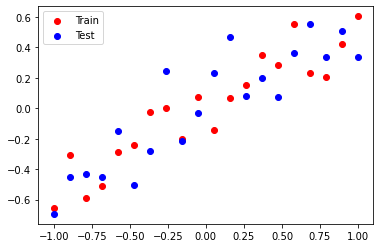

In [6]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

## ANN model implimentation

In [7]:
model_1 = Sequential()


model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))

In [8]:
# Optimizer
adam = Adam(learning_rate=0.01)

In [10]:
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test))

Epoch 1/500
1/1 [==============================] - 0s 417ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0462 - val_mse: 0.0462
Epoch 2/500
1/1 [==============================] - 0s 26ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 3/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 4/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 5/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0463 - val_mse: 0.0463
Epoch 6/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 7/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0463 - val_mse: 0.0463
Epoch 8/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0038 - mse: 0.0

In [11]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.003986866679042578, Test: 0.04549447074532509


In [12]:
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 81ms/step


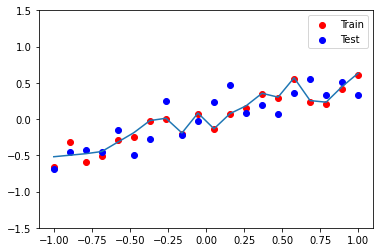

In [13]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

## Using droout for redusing overfitting

In [14]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)

In [15]:
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500,validation_data = (X_test, y_test))

Epoch 1/500
1/1 [==============================] - 0s 496ms/step - loss: 0.1267 - mse: 0.1267 - val_loss: 0.0551 - val_mse: 0.0551
Epoch 2/500
1/1 [==============================] - 0s 24ms/step - loss: 0.0374 - mse: 0.0374 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 3/500
1/1 [==============================] - 0s 26ms/step - loss: 0.0523 - mse: 0.0523 - val_loss: 0.0505 - val_mse: 0.0505
Epoch 4/500
1/1 [==============================] - 0s 25ms/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0410 - val_mse: 0.0410
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - mse: 0.0261 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 6/500
1/1 [==============================] - 0s 25ms/step - loss: 0.0316 - mse: 0.0316 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 7/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0226 - mse: 0.0226 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 8/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0205 - mse: 0.0

In [16]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0109774861484766, Test: 0.0383526012301445


In [ ]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=False)

In [ ]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.011907287873327732, Test: 0.03752660006284714


In [ ]:
y_pred_2 = model_2.predict(X_test)

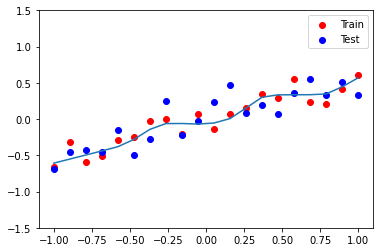

In [ ]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [17]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 41ms/step


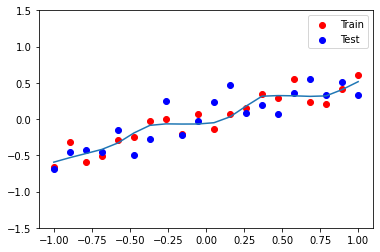

In [18]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()